# RNNを使った時系列データの扱い

In [ ]:
#Colaboratory環境の設定
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/稲伸ゼミナール/共有/python教室/河原電子ビジネス専門学校/lecture_2024/deep_learning2024/学生共有用/24_for_staff


Mounted at /content/drive
/content/drive/MyDrive/稲伸ゼミナール/共有/python教室/河原電子ビジネス専門学校/lecture_2024/deep_learning2024/学生共有用/24_for_staff


## RNNを使ってsin波を予測


2025-01-09 11:19:11.493963: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-09 11:19:11.494555: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-09 11:19:12.009120: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-09 11:19:12.236862: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736389152.328458   13114 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736389152.33

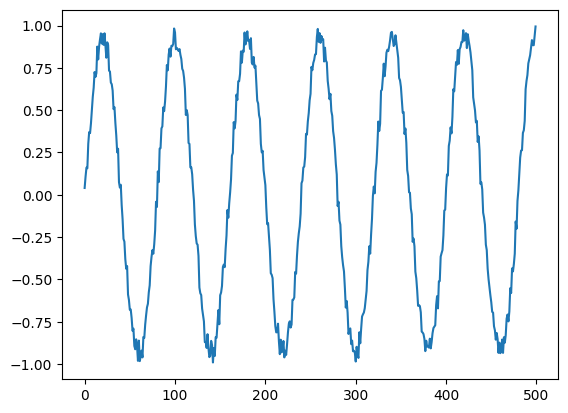

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import random
import os

#シード値の固定
seed = 1
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)

#データの読み込み
data = np.loadtxt("./rnn_sin_40_80.csv")
plt.plot(data[:500])
plt.show()

In [2]:
#history_stepsステップ数を入力に使い、future_stepsステップ数を予測する様にデータを加工する
def create_dataset(data, history_steps, future_steps):
    input_data = []
    output_data= []

    for i in range(len(data)-history_steps-future_steps):
        input_data.append([[val] for val in data[i:i+history_steps]])
        output_data.append(data[i+history_steps:i+history_steps+future_steps])

    return np.array(input_data), np.array(output_data)

train_data = data[:int(len(data) * 0.75)]
test_data = data[int(len(data) * 0.75):]

#10ステップ分のデータから５ステップ未来までを予測するようなデータを作成する
history_steps = 10
future_steps = 5
x_train, y_train = create_dataset(train_data, history_steps, future_steps)
x_test, y_test   = create_dataset(test_data, history_steps, future_steps)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2385, 10, 1)
(2385, 5)
(785, 10, 1)
(785, 5)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.optimizers import Adam

#モデルの構築
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=future_steps, input_shape=(history_steps,1),return_sequences=False))
model_rnn.add(Dense(future_steps,activation="linear"))
model_rnn.compile(optimizer = Adam(learning_rate=0.001), loss="mean_squared_error",)

#モデルの構造を表示する
print(model_rnn.summary())

#学習開始
history = model_rnn.fit(x_train, y_train, batch_size=32, epochs=500, verbose=1)

/media/shota/share/education/Deep_Learning/env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 5)              │            35 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            30 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65 (260.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/500
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4594 
Epoch 2/500
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2670
Epoch 3/500
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1671
Epoch 4/500
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1043
Epoch 5/500
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0671
Epoch 6/500
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0468
Epoch 7/500
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0354
Epoch 8/500
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0286
Epoch 9/500
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0241
Epoch 10/500
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0210
Epoch 11/500
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0188
Epoch 12/500
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0171
Epoch 13/500
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0158
Epoch 14/500
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0147
Epoch 15/500
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.013

## 9-3 RNNで予測したsin波の評価をしてみよう

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


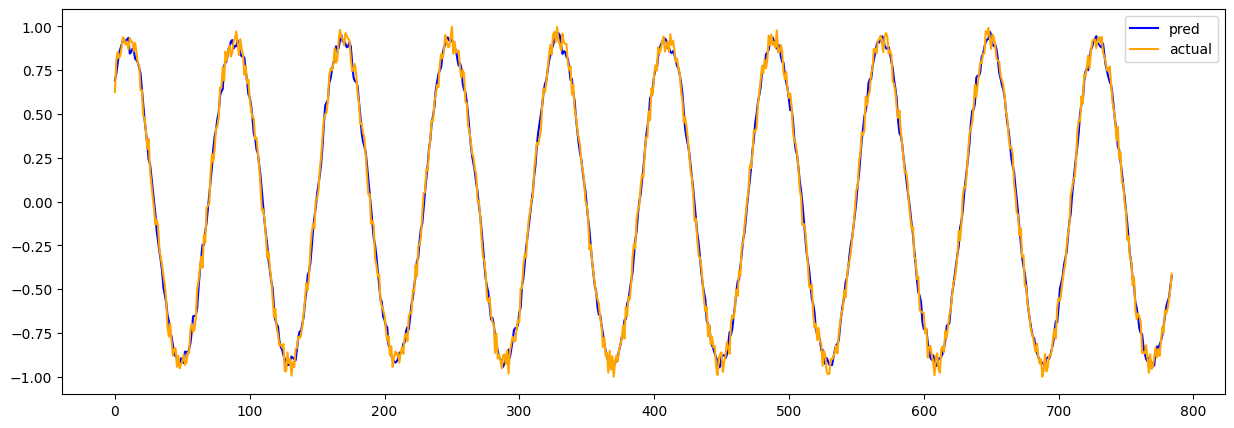

In [5]:
#学習したモデルで予測をする
y_pred = model_rnn.predict(x_test)

plt.figure(figsize=(15,5))
#青色で予測値、オレンジ色で実際の値を表示
plt.plot([p[0] for p in y_pred],color="blue",label="pred")
plt.plot([p[0] for p in y_test],color="orange",label="actual")
plt.legend()
plt.show()